In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf



from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

In [ ]:
import random
seed=42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Lod the  Data

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub
import os

# Download the dataset using the correct handle format
path_fake = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Path to fake dataset files:", path_fake)

# Access the Fake.csv file
fake_csv_path = os.path.join(path_fake, "Fake.csv")
print("Path to Fake.csv:", fake_csv_path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 64.3MB/s]

Extracting files...


Path to fake dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1
Path to Fake.csv: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1/Fake.csv


In [ ]:
Fake = pd.read_csv(os.path.join(path_fake, "Fake.csv"))
true = pd.read_csv(os.path.join(path_fake, "True.csv"))

In [ ]:
Fake['label']=0

In [ ]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
true['label']=1

In [ ]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
Fake.drop(['title','date', 'subject'], axis=1, inplace=True)
true.drop(['title','date', 'subject'], axis=1, inplace=True)

In [ ]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [ ]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [ ]:
News.isnull().sum()

,0
text,0
label,0


In [ ]:
News = News.sample(frac=1, random_state=42).reset_index(drop=True)
News

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1
...,...,...
44893,,0
44894,LONDON/TOKYO (Reuters) - British Prime Ministe...,1
44895,BERLIN (Reuters) - Chancellor Angela Merkel sa...,1
44896,Jesus f*cking Christ our President* is a moron...,0


In [ ]:
News.duplicated().sum()

6251

In [ ]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [ ]:
News.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38647 entries, 0 to 44896
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38647 non-null  object
 1   label   38647 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 905.8+ KB


In [ ]:
label_counts = News['label'].value_counts()
print(label_counts)


label
1    21192
0    17455
Name: count, dtype: int64


In [ ]:
News

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1
...,...,...
44890,NAIROBI (Reuters) - Burundi s main opposition ...,1
44892,Miss Universe 1996 Alicia Machado is now an Am...,0
44894,LONDON/TOKYO (Reuters) - British Prime Ministe...,1
44895,BERLIN (Reuters) - Chancellor Angela Merkel sa...,1


# preprocessing the text in the data:

In [ ]:
!pip install nltk
!pip install wordnet
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as npy
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10498 sha256=7d16b8cb80923c1bc35af41597e8d93b10df4460eb4326f489c43de7ffcc3275
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [ ]:
x = News['text']
y = News['label']

In [ ]:
x

,text
0,"21st Century Wire says Ben Stein, reputable pr..."
1,WASHINGTON (Reuters) - U.S. President Donald T...
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...
3,"On Monday, Donald Trump once again embarrassed..."
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid..."
...,...
44890,NAIROBI (Reuters) - Burundi s main opposition ...
44892,Miss Universe 1996 Alicia Machado is now an Am...
44894,LONDON/TOKYO (Reuters) - British Prime Ministe...
44895,BERLIN (Reuters) - Chancellor Angela Merkel sa...


In [ ]:
x = [process_text(text) for text in x]

In [ ]:
print(x[:10])

[['century', 'wire', 'stein', 'reputable', 'professor', 'pepperdine', 'university', 'also', 'hollywood', 'fame', 'appearing', 'show', 'film', 'ferris', 'bueller', 'made', 'provocative', 'statement', 'judge', 'jeanine', 'pirro', 'recently', 'discussing', 'halt', 'imposed', 'president', 'trump', 'executive', 'order', 'travel', 'referred', 'judgement', 'circuit', 'court', 'washington', 'state', 'coup', 'branch', 'constitution', 'went', 'call', 'seattle', 'political', 'puppet', 'judiciary', 'pawn', 'watch', 'interview', 'complete', 'note', 'stark', 'contrast', 'rhetoric', 'leftist', 'medium', 'pundit', 'neglect', 'ever', 'blocked', 'presidential', 'immigration', 'past', 'discus', 'legal', 'efficacy', 'actual', 'text', 'read', 'news', 'filessupport', 'work', 'subscribing', 'becoming', 'member'], ['washington', 'reuters', 'president', 'donald', 'trump', 'removed', 'chief', 'strategist', 'steve', 'bannon', 'national', 'security', 'council', 'wednesday', 'reversing', 'controversial', 'decision

In [ ]:
y.value_counts()

,count
label,
1,21192
0,17455


# split the texts and the labels of the fake and real news:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 91716


In [ ]:

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(X_test,maxlen=maxlen, padding='post', truncating='post')



In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)


# BiLSTM

In [ ]:
import time
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

# Xây dựng mô hình với BiLSTM và GlobalMaxPooling1D
def best_model():
    input_layer = Input(shape=(maxlen,))
    x = Embedding(v + 1, 100)(input_layer)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = GlobalMaxPooling1D()(x)  # Thêm lớp GlobalMaxPooling1D
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(2, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

best_model_instance = best_model()

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [ ]:
start_train_time = time.time()

history = best_model_instance.fit(
    X_train, y_train_one_hot,
    epochs=10,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping]
)

end_train_time = time.time()
train_time = end_train_time - start_train_time

Epoch 1/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 629s 647ms/step - accuracy: 0.9226 - loss: 0.1326 - val_accuracy: 0.9953 - val_loss: 0.0229
Epoch 2/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 627s 649ms/step - accuracy: 0.9978 - loss: 0.0107 - val_accuracy: 0.9984 - val_loss: 0.0100
Epoch 3/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 698s 665ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9983 - val_loss: 0.0103
Epoch 4/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 674s 657ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9986 - val_loss: 0.0125
Epoch 5/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 701s 677ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9979 - val_loss: 0.0133


In [ ]:
# Đo thời gian kiểm tra
start_test_time = time.time()

loss, accuracy_bilstm = best_model_instance.evaluate(X_test, y_test_one_hot)

end_test_time = time.time()
test_time = end_test_time - start_test_time

print("Training Time: {:.2f} seconds".format(train_time))
print("Test Time: {:.2f} seconds".format(test_time))
print("Best Model Test Loss:", loss)
print("Best Model Test Accuracy:", accuracy_bilstm)

242/242 ━━━━━━━━━━━━━━━━━━━━ 37s 151ms/step - accuracy: 0.9979 - loss: 0.0131
Training Time: 3329.91 seconds
Test Time: 41.06 seconds
Best Model Test Loss: 0.009994277730584145
Best Model Test Accuracy: 0.998447597026825


# LSTM

In [ ]:
import time
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping

# Xây dựng mô hình với BiLSTM và GlobalMaxPooling1D
def best_model():
    input_layer = Input(shape=(maxlen,))
    x = Embedding(v + 1, 100)(input_layer)
    x = LSTM(64, return_sequences=True)(x)  # Sử dụng LSTM thay vì BiLSTM
    x = GlobalMaxPooling1D()(x)  # Thêm lớp GlobalMaxPooling1D
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(2, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

best_model_instance = best_model()

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
start_train_time = time.time()

history = best_model_instance.fit(
    X_train, y_train_one_hot,
    epochs=10,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping]
)

end_train_time = time.time()
train_time = end_train_time - start_train_time

Epoch 1/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 250s 256ms/step - accuracy: 0.9191 - loss: 0.1548 - val_accuracy: 0.9966 - val_loss: 0.0155
Epoch 2/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 252s 246ms/step - accuracy: 0.9984 - loss: 0.0102 - val_accuracy: 0.9974 - val_loss: 0.0102
Epoch 3/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 250s 258ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9977 - val_loss: 0.0099
Epoch 4/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 254s 250ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9972 - val_loss: 0.0118
Epoch 5/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 240s 249ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9979 - val_loss: 0.0127
Epoch 6/10
967/967 ━━━━━━━━━━━━━━━━━━━━ 275s 262ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9969 - val_loss: 0.0162


In [ ]:
# Đo thời gian kiểm tra
start_test_time = time.time()

loss, accuracy_lstm = best_model_instance.evaluate(X_test, y_test_one_hot)

end_test_time = time.time()
test_time = end_test_time - start_test_time

print("Training Time: {:.2f} seconds".format(train_time))
print("Test Time: {:.2f} seconds".format(test_time))
print("Best Model Test Loss:", loss)
print("Best Model Test Accuracy:", accuracy_lstm)

242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9974 - loss: 0.0108
Training Time: 1529.43 seconds
Test Time: 10.31 seconds
Best Model Test Loss: 0.009908918291330338
Best Model Test Accuracy: 0.9976714253425598


# Comparison

In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Danh sách các mô hình
models = [
    MultinomialNB(),
    LogisticRegression(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),

]

model_names = ["LSTM","Bi-LSTM"]
accuracies = [0.9977*100,accuracy_bilstm*100]

for model in models:
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)

    model_names.append(model.__class__.__name__)
    accuracies.append(accuracy * 100)

    print(f"{model.__class__.__name__}:")
    print(f"  Accuracy: {accuracy * 100:.2f}%")
    print("-" * 30)


MultinomialNB:
  Accuracy: 61.72%
------------------------------
LogisticRegression:
  Accuracy: 67.83%
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier:
  Accuracy: 99.16%
------------------------------
DecisionTreeClassifier:
  Accuracy: 99.44%
------------------------------
RandomForestClassifier:
  Accuracy: 98.68%
------------------------------
KNeighborsClassifier:
  Accuracy: 58.71%
------------------------------
XGBClassifier:
  Accuracy: 99.42%
------------------------------


<ipython-input-49-8f5452dc1e59>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_names))


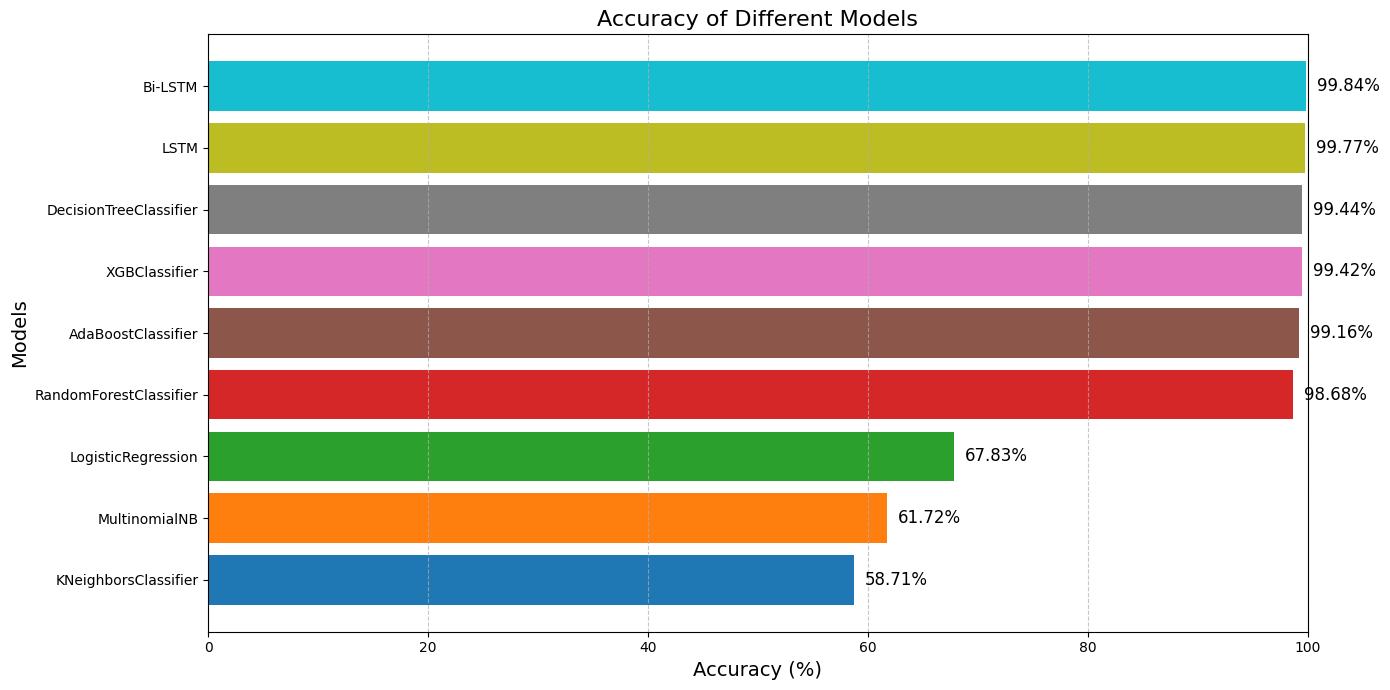

In [ ]:
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=False)

model_names = [model_names[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

# Create a list of colors (one for each model)
colors = plt.cm.get_cmap('tab10', len(model_names))

plt.figure(figsize=(14, 7))
plt.barh(model_names, accuracies, color=colors(range(len(model_names))))

plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.title('Accuracy of Different Models', fontsize=16)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(acc + 1, i, f"{acc:.2f}%", va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()